# Fontes:
## Vídeos
### 4 Basic Types of Cluster Analysis used in Data Analytics: https://www.youtube.com/watch?v=Se28XHI2_xE
## Artigos / Tutoriais
### https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
### https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
### https://www.datacamp.com/community/tutorials/k-means-clustering-python
## Documentação:
### https://scikit-learn.org/stable/modules/clustering.html

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Teste K-Means

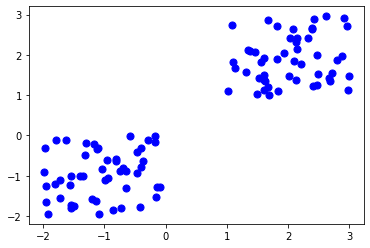

In [13]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [21]:
kmean = KMeans(n_clusters = 2)
kmean.fit(X)
centroids = kmean.cluster_centers_

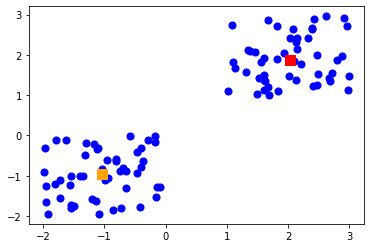

In [35]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.scatter(centroids[0][0], centroids[0][1], c = 'orange', marker = 's', s = 100)
plt.scatter(centroids[1][0], centroids[1][1], c = 'red', marker = 's', s = 100)
plt.show()

In [42]:
kmean.predict(np.array([1,-1]).reshape(1,-1))

array([0], dtype=int32)